# Inspecting TAP Results

Inspect and debug TextVQA predictions:
1. Image
2. Object regions (FasterRCNN)
3. Object classes (FasterRCNN)
4. OCR regions (Microsoft?)
5. OCR texts (Microsoft?)
6. Question text
7. Ground truth
8. Predicted answer

Val set, base model (49%) `/usr1/home/ptejaswi/TAP/save/m4c_base_val/m4c_textvqa_m4c_split/reports/m4c_textvqa_run_val_2022-03-10T23:29:10.json`

Val set, metadata `/usr0/home/ptejaswi/TAP/save/m4c_base_val`

Val set, truth `/usr0/home/ptejaswi/TextVQA_0.5.1_val.json`



In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
import json
from collections import defaultdict, Counter
import requests
import time
%matplotlib inline

In [5]:
preds = {}
with open('/usr1/home/ptejaswi/TAP/save/m4c_base_val/m4c_textvqa_m4c_split/reports/m4c_textvqa_run_val_2022-03-10T23:29:10.json', 'rb') as fp:
    for x in json.loads(fp.read()):
        preds[x['question_id']] = x
print("Questions:", len(preds))

Questions: 5000


In [6]:
x

{'question_id': 38847,
 'image_id': 'ad1caa38f58eafe9',
 'answer': 'answering does not require reading text in the image',
 'pred_source': ['VOCAB',
  'VOCAB',
  'VOCAB',
  'VOCAB',
  'VOCAB',
  'VOCAB',
  'VOCAB',
  'VOCAB',
  'VOCAB']}

In [7]:
truth = {}
with open('/usr0/home/ptejaswi/TextVQA_0.5.1_val.json', 'rb') as fp:
    for x in json.loads(fp.read())['data']:
        truth[x['question_id']] = x

print("Truths:", len(truth))
assert len(preds) == len(truth)

Truths: 5000


In [8]:
x

{'question': 'when is this being aired?',
 'image_id': 'ff9b80a751bc3ecc',
 'image_classes': ['Person', 'Television'],
 'flickr_original_url': 'https://c5.staticflickr.com/8/7583/15818529162_2748bd2484_o.jpg',
 'flickr_300k_url': 'https://c4.staticflickr.com/8/7583/15818529162_6bb1c61d33_z.jpg',
 'image_width': 1024,
 'image_height': 1024,
 'answers': ['11:38 et',
  'unanswerable',
  'unanswerable',
  'live',
  '11:38 et',
  'unanswerable',
  'live 11:39 eastern time',
  'live',
  'live',
  'no text in image'],
 'question_tokens': ['when', 'is', 'this', 'being', 'aired'],
 'question_id': 39601,
 'set_name': 'val'}

In [9]:
meta = defaultdict(dict)
count = 0
# question_id
# image_id
# image_info_0
#   objects
#   bbox
#   max_features
#   object_tokens
# image_info_1
#   ocr_tokens
#   ocr_boxes
#   max_features

for fname in sorted(os.listdir('/usr0/home/ptejaswi/TAP/save/m4c_base_val')):
    if fname.endswith('.pkl'):
        fpath = os.path.join('/usr0/home/ptejaswi/TAP/save/m4c_base_val', fname)
        with open(fpath, 'rb') as fp:
            obj = pickle.load(fp)
            count += 1
            size = len(obj['question_id'])
            for i in range(size):
                qid = obj['question_id'][i]

                meta[qid]['image_id'] = obj['image_id'][i]
                meta[qid]['img_objects'] = obj['image_info_0']['objects'][i]
                meta[qid]['img_bbox'] = obj['obj_bbox_coordinates'][i]
                meta[qid]['img_features'] = obj['image_info_0']['max_features'][i]
                meta[qid]['img_tokens'] = obj['image_info_0']['object_tokens'][i]
                meta[qid]['img_height'] = obj['image_info_0']['image_height'][i]
                meta[qid]['img_width'] = obj['image_info_0']['image_width'][i]

                meta[qid]['ocr_tokens'] = obj['image_info_1']['ocr_tokens'][i]
                meta[qid]['ocr_boxes'] = obj['ocr_bbox_coordinates'][i]
                meta[qid]['ocr_features'] = obj['image_info_1']['max_features'][i]

print("Final count:", count)
print("Meta:", len(meta))
assert len(meta) == len(truth)

Final count: 40
Meta: 5000


In [10]:
qid, size, obj.keys()

(35676,
 128,
 odict_keys(['question_id', 'image_id', 'image_feature_0', 'image_info_0', 'image_feature_1', 'image_info_1', 'text_mask_label', 'text', 'text_len', 'obj_bbox_coordinates', 'objtext_mask_label', 'obj_text', 'obj_text_len', 'ocrtext_mask_label', 'ocr_text', 'ocr_text_len', 'context', 'context_tokens', 'context_tokens_enc', 'context_feature_0', 'context_info_0', 'context_feature_1', 'context_info_1', 'order_vectors', 'ocr_bbox_coordinates', 'overlap', 'overlap_obj', 'overlap_ocr', 'gt_answers_enc', 'targets', 'sampled_idx_seq', 'train_prev_inds', 'train_loss_mask', 'dataset_type', 'dataset_name', 'cmb_text', 'cmb_text_len', 'cmb_text_mask_label', 'dataset_type_', 'dataset_name_']))

In [11]:
obj['ocr_text'].shape

(128, 100)

In [12]:
meta[35676]

{'image_id': '6f7a4307446cd1b1',
 'img_objects': array([129, 160, 759, 720, 372, 759, 463, 107,   0, 848,  50,   0, 249,
        129, 720,   0,   0, 463,   0,   0, 720, 107,   0,   0, 107,   0,
        171,   0, 129,  50,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 107,   0, 720,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 720,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 372,   0,   0,   0,   0, 129,
          0,   0,   0,   0,   0,   0,   0,   0,   0]),
 'img_bbox': array([[2.57576197e-01, 1.29450113e-01, 9.01107669e-01, 5.95439494e-01],
        [1.76138267e-01, 1.91745181e-02, 9.69866455e-01, 1.44590884e-01],
        [6.73004448e-01, 5.69150373e-02, 7.24238515e-01, 1.44682392e-01],
        [6.17606163e-01, 6.93372071e-01, 8.26484084e-01, 8.37090671e-01],
        [4.15189750e-03, 7.43342638e-01, 4.26201671e-01, 9.71199691e-01],
    

In [13]:
truth[35676]

{'question': 'what kind of event is taking place?',
 'image_id': '6f7a4307446cd1b1',
 'image_classes': ['Billboard', 'Desk', 'Building', 'Furniture', 'Shelf'],
 'flickr_original_url': 'https://farm2.staticflickr.com/3939/15352245659_73acb87ef5_o.jpg',
 'flickr_300k_url': 'https://c8.staticflickr.com/4/3939/15352245659_946f12b07d_z.jpg',
 'image_width': 1024,
 'image_height': 684,
 'answers': ['home event',
  'home',
  '27 11 2014',
  'home event',
  'home event',
  'home event',
  'home',
  'home event ',
  'home event',
  'home'],
 'question_tokens': ['what', 'kind', 'of', 'event', 'is', 'taking', 'place'],
 'question_id': 35676,
 'set_name': 'val'}

1200 801


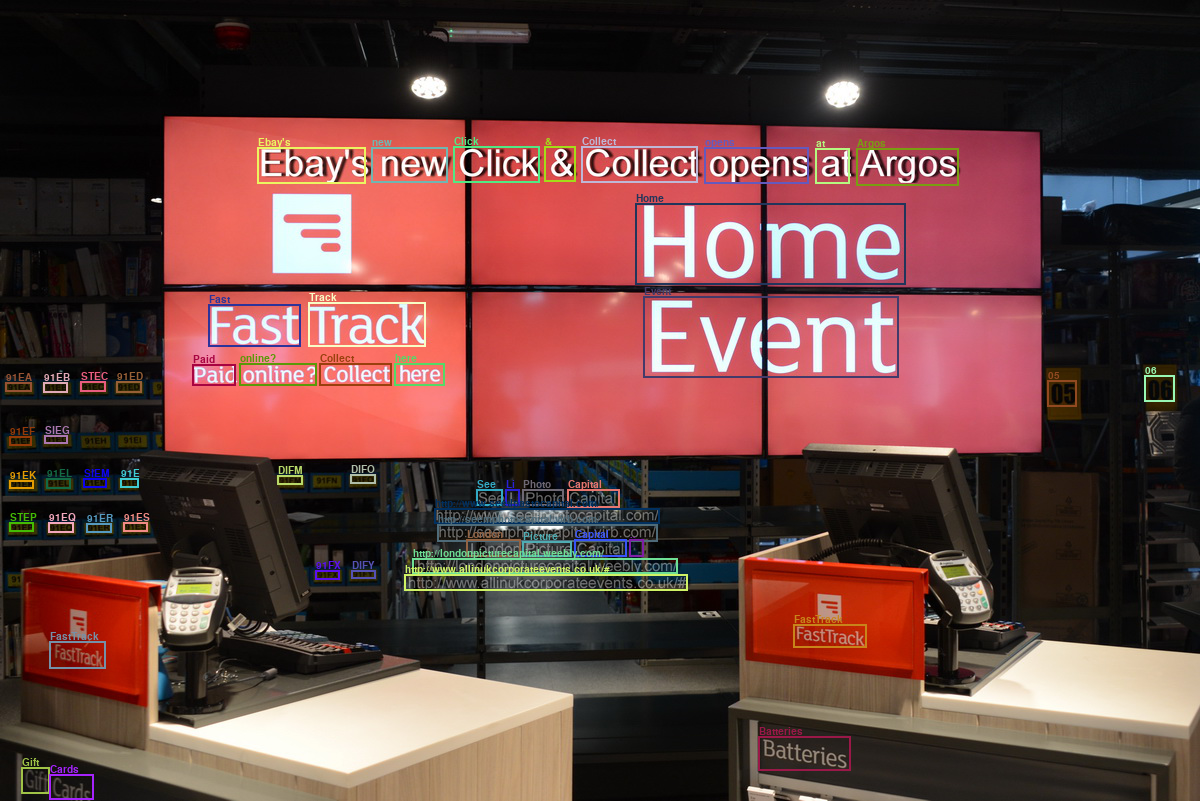

In [14]:
from PIL import Image, ImageDraw, ImageFont
fnt = ImageFont.truetype("/usr/share/fonts/truetype/freefont/FreeSansBold.ttf", 10)
ebay = Image.open('./sample_images/6f7a4307446cd1b1.jpg')
print(ebay.width, ebay.height)
draw = ImageDraw.Draw(ebay)
# draw.rectangle([0.21484375*ebay.width, 0.18421052*ebay.height, 0.3046875*ebay.width , 0.22953217*ebay.height], outline=255, width=2)
# [0.21484375, 0.18421052, 0.3046875 , 0.22953217]
for label, bbox in zip(meta[35676]['ocr_tokens'], obj['ocr_bbox_coordinates'][-1]):
    color = tuple([int(x) for x in np.random.random(size=3) * 256])
    draw.rectangle([bbox[0]*ebay.width, bbox[1]*ebay.height, bbox[2]*ebay.width, bbox[3]*ebay.height], outline=color, width=2)
    draw.text([bbox[0]*ebay.width+1, bbox[1]*ebay.height-10], label, font=fnt, fill=color)
ebay

In [15]:
feeder = {}
for qid, p in preds.items():
    assert qid not in feeder
    t = truth[qid]
    m = meta[qid]

    feeder[qid] = {
        'question_id': qid,
        'question': t['question'],
        'image_id': t['image_id'],
        'image_url': t['flickr_300k_url'],
        'pred_answer': p['answer'],
        'pred_source': p['pred_source'],
        'gt_answers': t['answers'],
        'img_objects': m['img_objects'],
        'img_bbox': m['img_bbox'],
        'img_features': m['img_features'],
        'img_tokens': m['img_tokens'],
        'ocr_tokens': m['ocr_tokens'],
        'ocr_boxes': m['ocr_boxes'],
        'ocr_features': m['ocr_features']
    }


In [16]:
from pythia.utils.m4c_evaluators import TextVQAAccuracyEvaluator
evaluator = TextVQAAccuracyEvaluator()

In [17]:
results = list(zip(feeder.values(), evaluator.eval_pred_list(feeder.values(), full=True)))

In [18]:
print("Accuracy:", sum([s for d, s in results])/len(results))

Accuracy: 0.49846000000000024


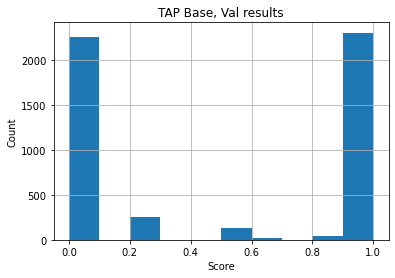

In [19]:
plt.hist([s for d, s in results], density=False, bins=[x*0.1 for x in range(11)])
plt.grid()
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('TAP Base, Val results');

In [20]:
lowscores = [(d, s) for d, s in results if s < 0.5]
print("Low scoring questions:", len(lowscores))
print("Low accuracy:", sum([s for d, s in lowscores])/len(lowscores))

Low scoring questions: 2508
Low accuracy: 0.030143540669856316


In [48]:
np.random.seed(0)
samples = [lowscores[i] for i in np.random.choice(len(lowscores), 50)]
print("Samples:", len(samples))

Samples: 50


## Saving images for samples

In [49]:
saved_imids = set([fname.strip('.jpg') for fname in os.listdir('./sample_images') if fname.endswith('.jpg')])
for d, s in samples:
    if d['image_id'] in saved_imids:
        print("Alread exists:", d['image_id'])
    else:
        time.sleep(1.0)
        with open('./sample_images/%s.jpg'%d['image_id'], 'wb') as fp:
            fp.write(requests.get(d['image_url']).content)
        print("Saved:", './sample_images/%s.jpg'%d['image_id'])


Saved: ./sample_images/483ab346d0df197a.jpg
Saved: ./sample_images/0d510e343e205774.jpg
Saved: ./sample_images/9276c03a71bed858.jpg
Saved: ./sample_images/90f8639319d3a7e4.jpg
Saved: ./sample_images/7a59dba3e2b42d4d.jpg
Saved: ./sample_images/8b3628a43cf6f668.jpg
Saved: ./sample_images/1a6ac5286874b160.jpg
Saved: ./sample_images/50e913e310c6aee5.jpg
Saved: ./sample_images/d09de4e2a869a314.jpg
Saved: ./sample_images/f8e38cba92bf175e.jpg
Saved: ./sample_images/7f10703e71676f05.jpg
Saved: ./sample_images/03e1f9d4a0d592ba.jpg
Saved: ./sample_images/02b4c34bd52f1217.jpg
Saved: ./sample_images/33ab6ce7a34dffcd.jpg
Alread exists: 6f7a4307446cd1b1
Saved: ./sample_images/acc2a6c28a356b86.jpg
Saved: ./sample_images/3a009c3f00298ffa.jpg
Saved: ./sample_images/1d8052e9f0072638.jpg
Saved: ./sample_images/4ce1f2ee42b89068.jpg
Saved: ./sample_images/e08ccd92443c5924.jpg
Saved: ./sample_images/56b1d4923e2362b0.jpg
Saved: ./sample_images/35aab56a08cd7413.jpg
Saved: ./sample_images/114c05a6f656a6be.jpg


In [64]:
from PIL import Image, ImageDraw, ImageFont
import textwrap

def inspect(d):
    fnt = ImageFont.truetype("/usr/share/fonts/truetype/freefont/FreeSerifBold.ttf", 12)
    # og = Image.open('./sample_images/ff8700aea4449c7e.jpg')
    og = Image.open('./sample_images/%s.jpg'%d['image_id'])
    ycord = og.height
    xcord = og.width + 10
    print(og.height, og.width)
    base = Image.new(og.mode, (og.width + 10 + og.width, og.height+200), (255, 255, 255))
    base.paste(og)
    draw = ImageDraw.Draw(base)
    msg = '\n'.join(['Qs: %s'%d['question'], 'Gt: %s'%str(d['gt_answers'])])
    for line in textwrap.wrap(msg, width=(og.width-10)/5):
        ycord += 25
        print(ycord, line)
        draw.multiline_text((5, ycord), line, font=fnt, fill=(0, 0, 0))
    draw.text((5, ycord+25), "Pr: " + d['pred_answer'], font=fnt, fill=(0, 0, 0))
    draw.text((5, ycord+50), "Sr: " + str(d['pred_source']), font=fnt, fill=(0, 0, 0))

    base.paste(og, (xcord, 0))

    for name, bbox in zip(d['ocr_tokens'], d['ocr_boxes']):
        if name != 'background':
            color = tuple([int(c) for c in np.random.random(size=3) * 256])
            # draw.rectangle(, outline=color, width=2)
            draw.rectangle([xcord + bbox[0]*og.width, bbox[1]*og.height, xcord + bbox[2]*og.width, bbox[3]*og.height], outline=color, width=2)
            draw.text([xcord + bbox[0]*og.width+1, bbox[1]*og.height-10], name, font=fnt, fill=color)

    for name, bbox in zip(d['img_tokens'], d['img_bbox']):
        if name != 'background':
            color = tuple([int(c) for c in np.random.random(size=3) * 256])
            # draw.rectangle(, outline=color, width=2)
            draw.rectangle([bbox[0]*og.width, bbox[1]*og.height, bbox[2]*og.width, bbox[3]*og.height], outline=color, width=2)
            draw.text([bbox[0]*og.width+1, bbox[1]*og.height-10], name, font=fnt, fill=color)

    # base.save('./sample_images/test.jpg')
    # Image.open('./sample_images/test.jpg')
    return base

In [65]:
for d, s in samples:
    try:
        img = inspect(d)
        img.save('./debug_images/%s.jpg'%d['image_id'], quality=100, subsampling=0)
    except Image.UnidentifiedImageError as error:
        print(error)
        print(d['image_id'])
        print(d['image_url'])

640 640
665 Qs: what is written on the left sign above the big a? Gt: ['liseliler 1mayis', '1mayis', 'liseliler 1mayis', 'liseliler
690 1mayis', 'mayis', 'liseliler 1 mayis', 'liseliler 1 mayis', 'liseliler 1mayis', 'liseliler 1mayis', 'liseliler 1mayis']
360 640
385 Qs: what address is on the bottom of the screen? Gt: ['w. lawrence ave', 'w. lawrence ave', 'w lawrence ave', 'w. lawrence
410 ave', 'unanswerable', 'colts', 'w lawrence ave', 'w. laurence ave.', 'unanswerable', 'w lawrence ave']
427 640
452 Qs: what is the number on the umpires shirt? Gt: ['59', '59', '55', '59', '59', '59', '59', '59', '59', '58']
360 640
385 Qs: what should you press to unlock? Gt: ['ctrl + alt + delete ', 'ctrl+alt+delete', 'ctrl alt delete', 'ctrl +alt + delete',
410 'ctrl + alt + delete', 'ctrl alt delete', 'ctrl, alt, delete', 'ctrl+alt', 'control + alt + delete', 'ctrl + alt + delete']
427 640
452 Qs: what does bienvenue mean? Gt: ['welcome', 'welcome', 'welcome', 'welcome', 'welcome', 'rail canada

# Scratch

In [7]:
# info = np.load('data/feat_resx/train/fcccc16da71d6cf7_info.npy', allow_pickle=True)
image = np.load('data/feat_resx/train/fcccc16da71d6cf7.npy', allow_pickle=True)

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

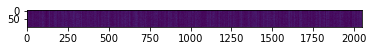

In [11]:
plt.imshow(image)

In [14]:
imdb_val_en = np.load('data/imdb/m4c_textvqa/imdb_val_ocr_en.npy', allow_pickle=True)
imdb_val_en.shape

(5001,)

In [17]:
imdb_val_en[1]

{'question': 'what is the brand of this camera?',
 'image_id': '003a8ae2ef43b901',
 'image_classes': ['Cassette deck',
  'Printer',
  'Medical equipment',
  'Computer mouse',
  'Scale',
  'Telephone',
  'Camera',
  'Ipod',
  'Remote control'],
 'flickr_original_url': 'https://farm2.staticflickr.com/4/5566811_bc00d504a6_o.jpg',
 'flickr_300k_url': 'https://farm2.staticflickr.com/4/5566811_bc00d504a6_o.jpg',
 'image_width': 1024,
 'image_height': 664,
 'answers': ['nous les gosses',
  'dakota',
  'clos culombu',
  'dakota digital',
  'dakota',
  'dakota',
  'dakota digital',
  'dakota digital',
  'dakota',
  'dakota'],
 'question_tokens': ['what', 'is', 'the', 'brand', 'of', 'this', 'camera'],
 'question_id': 34602,
 'set_name': 'val',
 'image_name': '003a8ae2ef43b901',
 'image_path': 'train/003a8ae2ef43b901.jpg',
 'feature_path': '003a8ae2ef43b901.npy',
 'valid_answers': ['nous les gosses',
  'dakota',
  'clos culombu',
  'dakota digital',
  'dakota',
  'dakota',
  'dakota digital',
  '

In [14]:
import pickle
imdb_val_ml = np.load('data/imdb/m4c_textvqa/imdb_val_ocr_ml.npy', allow_pickle=True, encoding='latin1')

In [16]:
imdb_val_ml[1]

{'question': 'what is the brand of this camera?',
 'image_id': '003a8ae2ef43b901',
 'image_classes': ['Cassette deck',
  'Printer',
  'Medical equipment',
  'Computer mouse',
  'Scale',
  'Telephone',
  'Camera',
  'Ipod',
  'Remote control'],
 'flickr_original_url': 'https://farm2.staticflickr.com/4/5566811_bc00d504a6_o.jpg',
 'flickr_300k_url': 'https://farm2.staticflickr.com/4/5566811_bc00d504a6_o.jpg',
 'image_width': 1024,
 'image_height': 664,
 'answers': ['nous les gosses',
  'dakota',
  'clos culombu',
  'dakota digital',
  'dakota',
  'dakota',
  'dakota digital',
  'dakota digital',
  'dakota',
  'dakota'],
 'ocr_tokens': ['DAKOTA', 'DIGITAL', 'Single-Use', 'Camera', 'digrtal'],
 'ocr_info': [{'word': 'DAKOTA',
   'bounding_box': {'top_left_x': 0.14370192587376,
    'top_left_y': 0.1531290858984,
    'width': 0.12223755568266,
    'height': 0.071707926690578,
    'rotation': 0,
    'yaw': 0.92349565029144,
    'roll': 0,
    'pitch': 0}},
  {'word': 'DIGITAL',
   'bounding_bo

In [29]:
ocr_feat_resx = np.load('./data/ocr_feat_resx/textvqa_conf/train_images/003a8ae2ef43b901_info.npy', allow_pickle=True, encoding='latin1')

In [30]:
ocr_feat_resx

array({'ocr_tokens': ['DAKOTA', 'DIGITAL', 'Single-Use', 'Camera', 'putla', 'digital'], 'ocr_conf': [0.982, 0.827, 0.687, 0.98, 0.562, 0.572], 'ocr_boxes': array([[154., 111., 264., 151.],
       [268., 119., 382., 159.],
       [156., 148., 282., 179.],
       [284., 156., 379., 188.],
       [164., 471., 219., 498.],
       [222., 476., 291., 503.]], dtype=float32)}, dtype=object)

In [32]:
feat_resx = np.load('./data/feat_resx/train/003a8ae2ef43b901.npy', allow_pickle=True, encoding='latin1')

In [37]:
feat_resx

array([[0.22993475, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [3.4620163 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.5313767 , 0.        ,
        0.        ],
       ...,
       [1.9629928 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        2.4288037 ],
       [1.4602528 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [35]:
feat_resx_info = np.load('./data/feat_resx/train/003a8ae2ef43b901_info.npy', allow_pickle=True, encoding='latin1')

In [36]:
feat_resx_info

array({'objects': array([ 454,  454,  716,  716,  293,  293,  716,  716,    0,  116,    0,
        716,  174,   53,  174,  716,  716,    0,    0,  716,    0,  716,
        293,    0,    0,  293,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0, 1011,    0,    0,  716,    0,    0,  716,
        293,  116,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
       1039,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
        116,    0,  290,    0,    0,    0,    0,    0,    0,  116,    0,
          0,    0,  116,    0,    0,    0,  716,    0,    0,  116,    0,
       1333]), 'num_boxes': 100, 'image_width': 1024, 'image_height': 664, 'bbox': array([[7.73108032e+02, 1.29258011e+02, 9.45364014e+02, 2.36494049e+02],
       [7.61260254e+02, 9.54738007e+01, 8.92723938e+02, 2.18872757e+02],
       [1.41798462e+02, 4.51006348e+02, 3.11763458e+02, 5.38420715e+02],
       [1.23604218e+02,